In [3]:
import pandas as pd          #For dataframe related operations
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [6]:
raw = pd.read_csv('rides.csv',parse_dates=['EntryDateTime','ExitDateTime'])

C:\Users\harsh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920377 entries, 0 to 920376
Data columns (total 15 columns):
TripNumber               920377 non-null int64
VehicleYr                920377 non-null int64
VehicleMake              920246 non-null object
VehicleModel             920246 non-null object
LicensePlate             920135 non-null object
MPG_MPGe                 888359 non-null float64
MatchedRide              920272 non-null object
EntryDateTime            917448 non-null datetime64[ns]
PickupDropoffDateTime    604514 non-null object
ExitDateTime             918305 non-null datetime64[ns]
MultiPartyTrips          920377 non-null object
LongitudeLatitude        920365 non-null object
EGGRGramsCO2PerMile      173 non-null float64
GGR                      105 non-null float64
NumberOfParties          315863 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(7)
memory usage: 105.3+ MB


In [9]:
raw.head()

,TripNumber,VehicleYr,VehicleMake,VehicleModel,LicensePlate,MPG_MPGe,MatchedRide,EntryDateTime,PickupDropoffDateTime,ExitDateTime,MultiPartyTrips,LongitudeLatitude,EGGRGramsCO2PerMile,GGR,NumberOfParties
0,1,2014,Toyota,4Runner,689,19.0,YES,2018-04-30 22:53:00,NaN,2018-05-01 00:02:00,SP,"32.731120000000004, -117.20303999999999",NaN,NaN,1.0
1,2,2015,Nissan,Versa,898,35.0,NO,2018-04-30 23:57:00,NaN,2018-05-01 00:03:00,SP,"32.731, -117.20293999999998",NaN,NaN,1.0
2,3,2015,Chevrolet,Malibu,967,24.0,YES,2018-04-30 23:59:00,NaN,2018-05-01 00:04:00,SP,"32.73178, -117.19746",NaN,NaN,1.0
3,4,2016,Nissan,Altima,983,NaN,NO,2018-04-30 23:59:00,NaN,2018-05-01 00:03:00,SP,"32.73178, -117.19738000000001",NaN,NaN,1.0
4,5,2007,Honda,Civic,101,26.0,NO,2018-04-30 23:27:00,NaN,2018-05-01 00:03:00,SP,"32.73109, -117.20328",NaN,NaN,1.0


In [14]:
raw_dp=raw.drop(['TripNumber','LicensePlate','PickupDropoffDateTime','MatchedRide','MultiPartyTrips','LongitudeLatitude','EGGRGramsCO2PerMile','GGR','NumberOfParties'],axis=1)

In [15]:
raw_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920377 entries, 0 to 920376
Data columns (total 6 columns):
VehicleYr        920377 non-null int64
VehicleMake      920246 non-null object
VehicleModel     920246 non-null object
MPG_MPGe         888359 non-null float64
EntryDateTime    917448 non-null datetime64[ns]
ExitDateTime     918305 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 42.1+ MB


In [104]:
raw_dp['Count']=1
raw_dp.to_csv('Rideshare_timeseries.csv')

In [18]:
raw_ts=raw_dp[['EntryDateTime','Count']]

In [25]:
raw_ts.index=raw_ts.EntryDateTime
raw_ts.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 920377 entries, 2018-04-30 22:53:00 to 2018-06-30 23:46:00
Data columns (total 2 columns):
EntryDateTime    917448 non-null datetime64[ns]
Count            920377 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.1 MB


In [30]:
hourly_raw = raw_ts.resample('H').sum()

In [31]:
hourly_raw

,Count
EntryDateTime,
2017-12-02 15:00:00,478
2017-12-02 16:00:00,2531
2017-12-02 17:00:00,1374
2017-12-02 18:00:00,1468
2017-12-02 19:00:00,1280
2017-12-02 20:00:00,1277
2017-12-02 21:00:00,261
2017-12-02 22:00:00,469
2017-12-02 23:00:00,258


In [90]:
hourly_raw['TimeStamp']=pd.to_datetime(hourly_raw.index)
hourly_raw.info()
cols=hourly_raw.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5049 entries, 2017-12-02 15:00:00 to 2018-06-30 23:00:00
Data columns (total 2 columns):
TimeStamp    5049 non-null datetime64[ns]
Count        5049 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 118.3 KB


In [80]:
#reorder the column order
hourly_raw=hourly_raw[cols[1:]+cols[:-1]]

In [91]:
hourly_raw.head()

,TimeStamp,Count
EntryDateTime,,
2017-12-02 15:00:00,2017-12-02 15:00:00,478
2017-12-02 16:00:00,2017-12-02 16:00:00,2531
2017-12-02 17:00:00,2017-12-02 17:00:00,1374
2017-12-02 18:00:00,2017-12-02 18:00:00,1468
2017-12-02 19:00:00,2017-12-02 19:00:00,1280


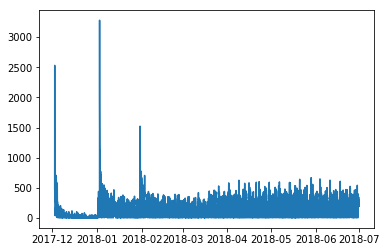

In [112]:
daily_raw = hourly_raw.resample('D').sum()
plt.plot(hourly_raw.Count)